# Đọc chuỗi thời gian 

1) Cung cấp một vài câu lệnh đọc chuỗi thời gian vào chương trình để thực hiện phân tích  

2) Vẽ hình 

3) Tạo bảng chuỗi thời gian với dữ liệu ngày tháng năm và dữ liệu ban đầu t, t-1, t-2

In [2]:
# Đọc chuỗi thời gian 
import pandas as pd 
df=pd.read_csv('daily-total-female-births.csv')


In [3]:
#Đọc 5 dữ liệu đầu tiên của chuỗi thời gian 
df.head(5)

,Date,Births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44


In [4]:
# Mô tả chuỗi thời gian với số lượng dữ liệu, kỳ vọng (mean), độ lệch tiêu chuẩn (std), min, max và phân vị mức  0,25; 0,5; 0,75
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [5]:
dt=pd.Series(df.Births.to_list(),index=df.Date.to_list(), name="Thu")

In [6]:
dt.head(5)

1/1/1959    35
1/2/1959    32
1/3/1959    30
1/4/1959    31
1/5/1959    44
Name: Thu, dtype: int64

In [7]:
#Kích thước của chuỗi 
print(dt.size)

365


In [9]:
dt[1]

32

In [ ]:
#Lấy một điểm dữ liệu 
dt['1959-05-03']

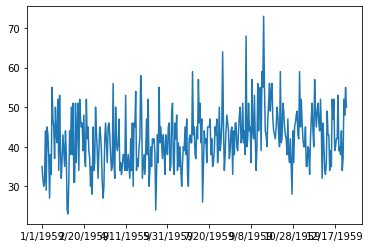

In [10]:
#Vẽ đồ thị chuỗi thời gian 
import matplotlib.pyplot as plt
dt.plot()
plt.show()

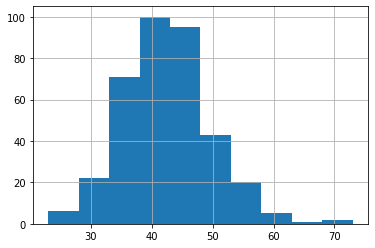

In [11]:
#Vẽ biểu đồ hist thực nghiệm của dữ liệu 
dt.hist()
plt.show()

In [ ]:
dt

1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Thu, Length: 365, dtype: int64

In [ ]:
import datetime
dataframe = pd.DataFrame()
dataframe['year'] = [datetime.datetime.strptime(dt.index[i], '%Y-%m-%d').year  for i in range(len(dt))]
dataframe['month'] = [datetime.datetime.strptime(dt.index[i], '%Y-%m-%d').month  for i in range(len(dt))]
dataframe['day'] = [datetime.datetime.strptime(dt.index[i], '%Y-%m-%d').day for i in range(len(dt))]
dataframe['t'] = [dt[i] for i in range(len(dt))]
dataframe['t-1']=dataframe['t'].shift(1)
dataframe['t-2']=dataframe['t'].shift(2)
print(dataframe.head(5))

# Ví dụ 2

1) Chọn một tập dữ liệu chuỗi thời gian từ bất cứ nguồn nào hoặc tự tạo ra 
2) Vẽ đồ thị 
3) Tách ra được các thành phần trend, seasonal, residual 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [14]:
data =pd.read_csv('data.csv', sep=",", parse_dates=["datetime"])
data["datetime"] = data["datetime"].dt.date
data.set_index("datetime", inplace=True)
data = data.asfreq("D")
data

,value
datetime,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1
...,...
2018-12-26,649103.9
2018-12-27,639571.2
2018-12-28,602541.7


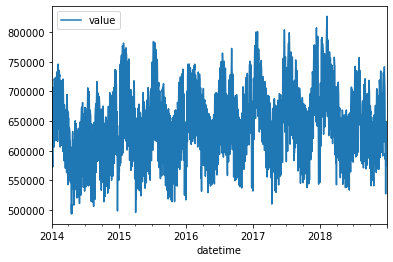

In [15]:
data.plot()
plt.show()

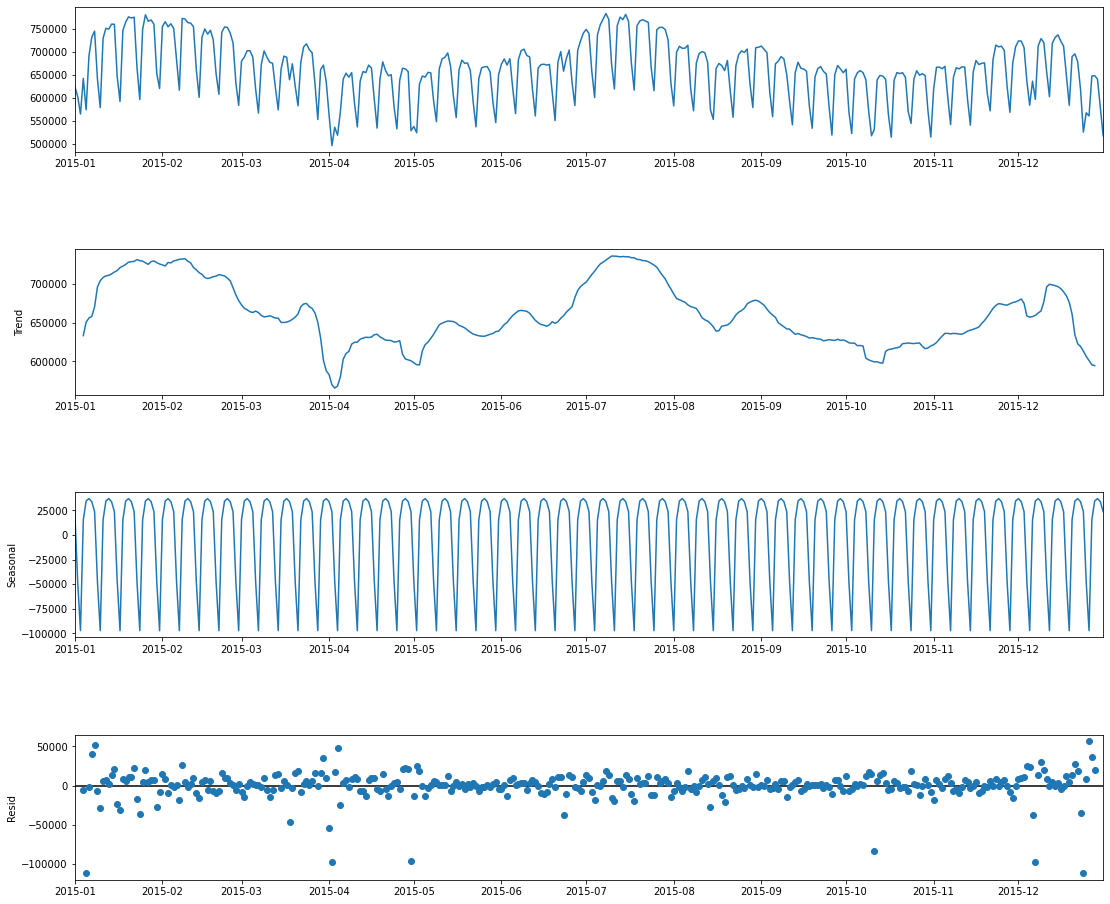

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.loc["2015"], model='additive')
fig = result.plot()
fig.set_size_inches(18, 14)

Bài tập về nhà: 
 Cho bộ dữ liệu chất lượng không khí ở phần Dữ liệu gồm thông tin về chất lượng không khí theo ngày ở New York. Các biến gồm nhiều chỉ số chất lượng không khí. 
(a) Tải tập dữ liệu vào môi trường python. 

(b) Xét cấu trúc của tập dữ liệu.

(c) Vẽ đồ thị cho từng chuỗi có thể trong số bốn chuỗi 

(d) Nhận xét và phân tích về chuỗi thời gian 